# Homework 5

All work here is my own, no code was shared with anyone else.

## Q1: Sawtooth function

$ f(x) = x; 0<x<1 \\
f(x) = 0; 1<x<2$

a) Plot the sawtooth function for x between 0 and 2 (as in class)
b) Approximate the sawtooth function with Fourier series. Plot the approximations for k=1,3,5,10,25, 100

In [145]:
import numpy as np  # also can pull from scipy
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy.io import loadmat
from scipy.io import wavfile

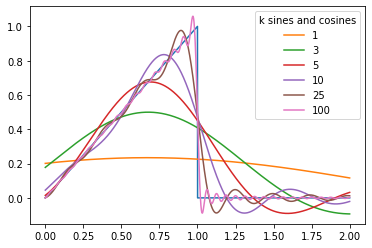

In [233]:
resolution = 0.0001
x = np.arange(0,2,resolution)
saw =  np.zeros_like(x)
sawfft =  np.zeros_like(x)

# sawtooth function
saw[:int(x.size/2)] = x[:int(x.size/2)]
saw[int(x.size/2):]= 0.

plt.figure()
plt.plot(x,saw)

a0=np.trapz(saw,x)/np.pi/2
sawfft=sawfft+a0

# I used the numpy trapz code from the file given in class / on slack
# as the results were much better than using the technique with the step function

n=np.array([1,3,5,10,25,100])
for p in n:
  for i in range(p):
    i=i+1
    a=np.trapz(saw*np.sin(i*x),x)/np.pi
    b=np.trapz(saw*np.cos(i*x),x)/np.pi
    sawfft=sawfft+a*np.sin(i*x)+b*np.cos(i*x)
  plt.plot(x,sawfft,label=p)
  sawfft = np.zeros_like(x)+a0

# plt.plot(x,square)    
plt.legend(title='k sines and cosines')
plt.show()

## Q2. Using dataF.mat

Load the file dataF.mat into your workspace. This file has variables named s and sr which you will need to load. The data has been sampled at $F_s = 2000 Hz$.

a) Create an appropriate time vector (t) for s based on the information above. Plot s vs t. You will see that this is a sinusoidal variation with 5 complete cycles. From this plot, calculate the frequency of this sinusoid. You can do this by determining the time T taken for 1 complete cycle of the sinusoid. The frequency is given by 1/T.



The cycle frequency is  10.0 Hz.



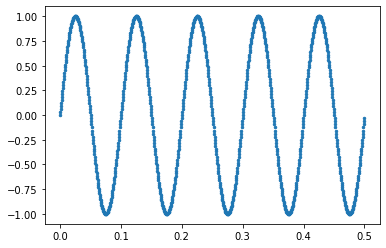

In [185]:
filedata = loadmat('dataF.mat') # get data
s = filedata['s']
sr = filedata['sr']

# print(s.shape) # looks like 1000 data points
N = s.shape[1]
fs = 2000 # given in problem
tau = N/fs # total time sampled in seconds

t = np.linspace(0,tau,N)

cycletime = (N/fs)/5 # 5 full cycles in the recorded time
freq = 1/cycletime

print('The cycle frequency is ', freq, 'Hz.\n')
plt.figure()
plt.scatter(t,s, s=6)

b) The plot in (a) shows the functional variation of s with time variable t. Function $s = f(t)$ can be approximated by the complex discrete Fourier series (as covered in class). 

Calculate $f_0, f_1, f_2, f_3, f_4, f_5, f_6$. These are the first 7 frequencies in Hz which will be present in the Fourier transform of s.

In [216]:
# first_seven = np.linspace(0,6,7)
# freq_seven = first_seven / tau

t2 = np.linspace(0,tau,N+1) # needed to redefine t to deal with off-by-one error in frequencies
f_k = t2*fs / tau

print('The first seven frequencies in the Fourier transform will be:', f_k[0:7], 'Hz.\n')

The first seven frequencies in the Fourier transform will be: [ 0.  2.  4.  6.  8. 10. 12.] Hz.



c) Calculate the corresponding $C_0, C_1, C_2, C_3, C_4, C_5, C_6$ coefficients from the sum equation given in part b. 

In [207]:
e_k = np.zeros((1001), dtype=complex)
c_k = np.zeros((1001), dtype=complex)

for k in range(0,N):
  sumj = 0.0
  for j in range(0,N):
    sumj += (s[:,j] * (np.e ** (-1j * 2 * np.pi * f_k[k] * t2[j])))
  c_k[k] = (1/N) * sumj

# this was EXTREMELY challenging and time consuming. I wrestled with this problem (2C) for many, many hours. I still am not sure this works properly.

In [213]:
print('The first seven coefficents corresponding to the frequencies:')
print(c_k[0:7])

The first seven coefficents corresponding to the frequencies:
[ 6.12357387e-17+0.00000000e+00j  1.39402379e-17+1.90999831e-17j
 -1.49748269e-16+9.87471281e-17j -1.29792010e-16-1.07590911e-16j
  7.92491073e-17-1.01975828e-16j -3.26197402e-17-5.00000000e-01j
  6.72656375e-17-7.49051429e-17j]


D) Calculate the corresponding power spectrum (energy).

E) Out of the frequencies, which has the maximum energy?

In [218]:
P_k = (np.abs(c_k))**2 / N

print('The first seven power levels for the first seven frequencies are: \n', P_k[0:7]) 

The first seven power levels for the first seven frequencies are: 
 [3.74981569e-36 5.59139586e-37 3.21755395e-35 2.84217701e-35
 1.66794905e-35 2.50000000e-04 1.01354464e-35]


> Clearly the power for $f_6$ is the highest by far, with a power level at $10^{-4}$, compared to the others with power at $10^{-36}$ range. (We know the signal is 10Hz so this matches).

F) Use the fft command to compute the Fourier coefficients, compare to those above.

In [230]:
f = np.fft.fft(s)

coeff = np.zeros(7)

for b in range(0,7):
  onecoeff = f.T[b] / N
  print(onecoeff)
  coeff[b] = np.abs(onecoeff)

[-4.82930008e-17+0.j]
[9.21315037e-18+1.89293026e-17j]
[-8.37943155e-17+7.82893944e-17j]
[-1.05639422e-16-7.14983628e-17j]
[3.17490128e-17-2.61779885e-17j]
[-1.51158566e-16-0.5j]
[5.67874778e-18-7.94755139e-17j]


> These coefficients are different than the ones I found.

G) Plot the absolute values of the Fourier coefficients as determined by fft against an appropriate frequency vector. The plot should show the peak at the right value of the dominant frequency in f.

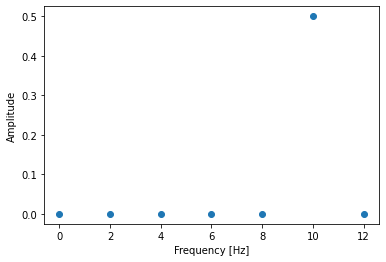

In [232]:
plt.figure()
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.scatter(f_k[0:7], coeff)

The dominant frequency is shown as 10Hz, which is correct.

## Q3: Data from sr

The data in sr has been sampled at 2000Hz. I have created sr by mixing 4 different sines with random noise.

a) create an appropriate time vector for sr based on the information above. Plot sr versus that time vector.

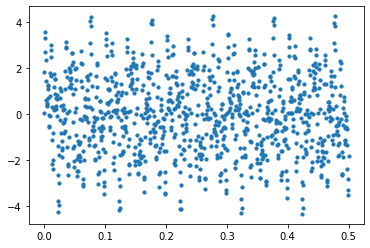

In [162]:
N = sr.shape[1]
fs = 2000 # given in problem
tau2 = N/fs # total time sampled in seconds

tr = np.linspace(0,tau2,N) # this still creates an off-by-one error in the actual frequencies; number of points should be N+1 but this doesn't match with the original data with N points
# print(tr)

plt.figure()
plt.scatter(tr, sr, s=10)

b) Plot the absolute values of the Fourier coefficients (as determined from fft command) against an appropriate frequency vector

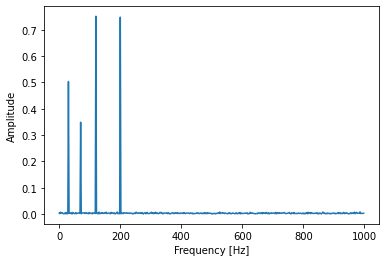

In [140]:
tr = np.linspace(0,tau2,N+1) # redefined tr to fix the off by one error
freq = tr*fs / tau2  # this should stop at the Nyquist frequency

f = np.fft.fft(sr)

# print(freq.shape)
# print(f.shape)

plt.figure()
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.plot(freq[:N//2], np.abs(f.T)[:N//2]*1/N) # like the code from class, but had to transpose f 

c) From the locations of these peaks, determine the frequency in Hz of the sines mixed in the signal.

In [144]:
amps = np.abs(f.T)[:N//2]*1/N

for i in range(amps.shape[0]):
  if amps[i] > 0.01:
    print('A sine frequency in the signal is: ', freq[i], 'Hz')

A sine frequency in the signal is:  30.0 Hz
A sine frequency in the signal is:  70.0 Hz
A sine frequency in the signal is:  120.0 Hz
A sine frequency in the signal is:  200.0 Hz


## Q4: Wilhelm.wav audio file

Read the file wilhelm.wav in python. This is an audio file for the famous Wilhelm scream which has been used in numerous Hollywood movies. In this question you will figure out the frequency content in this file.

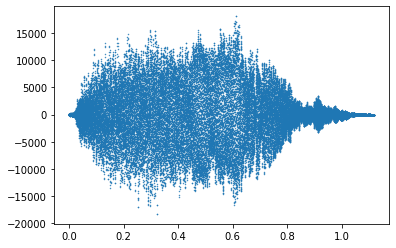

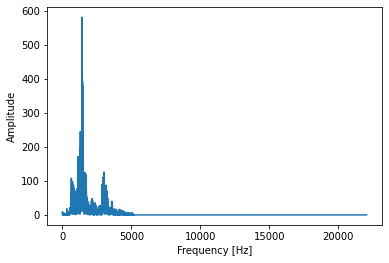

Prominent frequencies in the wav file are (in Hz):
1124.5934257811705
1125.488802712525
1126.3841796438794
1127.279556575234
1128.1749335065883
1129.070310437943
1135.3379489574238
1136.2333258887782
1142.5009644082593
1150.559356790449
1151.4547337218037
1152.350110653158
1155.931618378576
1156.8269953099302
1157.7223722412846
1158.6177491726394
1290.2381580817412
1292.02891194445
1293.8196658071588
1294.7150427385134
1295.6104196698677
1300.08730432664
1301.878058189349
1303.6688120520575
1305.4595659147665
1307.2503197774756
1309.0410736401843
1310.831827502893
1312.6225813656022
1340.3792662375895
1342.1700201002984
1343.9607739630073
1351.1237894138428
1354.7052971392604
1356.4960510019696
1358.2868048646783
1360.077558727387
1361.868312590096
1362.7636895214505
1363.6590664528048
1366.3451972468683
1367.2405741782225
1369.0313280409314
1391.4157513247924
1392.3111282561467
1394.1018821188557
1396.788012912919
1398.5787667756279
1399.4741437069822
1402.1602745010455
1403.055651432

In [180]:
samplerate, data = wavfile.read('wilhelm.wav')

s = data[:,0]
fs = 44100
N = s.shape[0]
tau3 = N/fs # total time sampled in seconds

tw = np.linspace(0,tau3,N)

plt.figure()
plt.scatter(tw, s, s=0.2) # plot the data

tw = np.linspace(0,tau3,N+1)
freq = tw*fs / tau3

f = np.fft.fft(s)

plt.figure()
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.plot(freq[:N//2], np.abs(f.T)[:N//2]*1/N) # again, like the code from class, but had to transpose f 
plt.show()

amps = np.abs(f.T)[:N//2]*1/N

print('Prominent frequencies in the wav file are (in Hz):')
for i in range(amps.shape[0]):
  if amps[i] > 110: # arbitrary minimum for 'prominence' based on visual inspection of the plot
    print(freq[i])